In [ ]:
pip install plotly

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import ast
import io
import plotly.express as px
import folium
from folium.plugins import MeasureControl
import branca
import seaborn as sns; sns.set()
import colorcet as cc
from folium.features import DivIcon
from folium.plugins import HeatMap

In [30]:
data = pd.read_csv('/data9/GR6901Spring2024/work/garimar/soil_data.csv')
data.set_index('XRF number',inplace=True)
data

,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude
XRF number,,,,,,,,,
1555.0,Crop field with barley,464.0,17.0,2.0,low,acidic,51.910843,10.510960,258.7
1559.0,Barley field in contaminated area,383.0,16.0,2.0,low,NaN,51.910840,10.510907,250.9
1557.0,Bottom of slag hip near the path,2241.0,39.0,6.0,high,acidic,51.910128,10.509704,264.2
1556.0,Slag heap,9189.0,95.0,6.0,high,acidic,51.910076,10.509595,253.5
1563.0,Slag heap metallophytes near birch tree,8115.0,79.0,6.0,high,acidic,51.910152,10.509579,220.9
...,...,...,...,...,...,...,...,...,...
1597.0,"Near wheel tracks, amongst blueberries",1703.0,33.0,2.0,low,NaN,51.892563,10.421937,406.8
1598.0,Tail at stop 3 near restaurant,1327.0,28.0,2.0,low,NaN,51.862207,10.296524,404.6
1599.0,"KS 4th site, near metallophytes but little gre...",10200.0,100.0,2.0,low,NaN,51.941335,10.348589,238.7


In [31]:
with_sites = pd.read_csv('soil-sampling-with-sites.csv')
site_ids = with_sites[['XRF number','ID']]
site_ids['Site']= with_sites['ID'].astype(str).str[0]

site_ids = site_ids[0:60]
site_ids

/tmp/ipykernel_464315/2993712640.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,XRF number,ID,Site
0,1555.0,1HG-01/240604,1
1,1559.0,1HG-02 24.06.04 9:20am,1
2,1557.0,1HG-03/240604,1
3,1556.0,1HG-04/240604,1
4,1563.0,1HG-05 24-06-04,1
5,1551.0,1HG-06/240604,1
6,1550.0,1HG-07/240604,1
7,1553.0,1HG-08/240604,1
8,1554.0,1HG-09/240604,1
9,1549.0,1HG-10/240604,1


In [32]:
data = pd.merge(data, site_ids, left_on=data.index, right_on='XRF number')
data

,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude,XRF number,ID,Site
0,Crop field with barley,464.0,17.0,2.0,low,acidic,51.910843,10.510960,258.7,1555.0,1HG-01/240604,1
1,Barley field in contaminated area,383.0,16.0,2.0,low,NaN,51.910840,10.510907,250.9,1559.0,1HG-02 24.06.04 9:20am,1
2,Bottom of slag hip near the path,2241.0,39.0,6.0,high,acidic,51.910128,10.509704,264.2,1557.0,1HG-03/240604,1
3,Slag heap,9189.0,95.0,6.0,high,acidic,51.910076,10.509595,253.5,1556.0,1HG-04/240604,1
4,Slag heap metallophytes near birch tree,8115.0,79.0,6.0,high,acidic,51.910152,10.509579,220.9,1563.0,1HG-05 24-06-04,1
5,On the other side of the filled-in area,374.0,13.0,2.0,low,acidic,51.892292,10.421621,409.5,1563.0,1HG-05 24-06-04,1
6,Slag heap uphill,3728.0,54.0,6.0,high,acidic,51.910379,10.508256,268.6,1550.0,1HG-07/240604,1
7,Slag heap top,3897.0,50.0,4.0,medium,acidic,51.910842,10.508444,268.6,1551.0,1HG-06/240604,1
8,Former crop area bottom slag heap west with me...,3580.0,49.0,3.0,low,acidic,51.910924,10.506591,256.7,1553.0,1HG-08/240604,1
9,"Edge former crop area with tree, sample from a...",958.0,24.0,4.0,medium,acidic,51.911172,10.507209,257.1,1554.0,1HG-09/240604,1


In [33]:

data['Site'] = data['Site'].replace({'1': 'A', '2': 'B', '3':'C', '4':'D'})
data.sort_values(by='Site',inplace=True)
data['Site-2'] = 0
data.reset_index(drop=True, inplace=True)

data.loc[0:15, 'Site-2'] = np.arange(0,16,1)
data.loc[16:29, 'Site-2'] = np.arange(0,14,1)
data.loc[30:44, 'Site-2'] = np.arange(0,15,1)
data.loc[45:59, 'Site-2'] = np.arange(0,15,1)
data['Site ID'] = data['Site'].astype(str) + '-' + data['Site-2'].astype(str)



data


,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude,XRF number,ID,Site,Site-2,Site ID
0,Crop field with barley,464.0,17.0,2.0,low,acidic,51.910843,10.510960,258.7,1555.0,1HG-01/240604,A,0,A-0
1,Next to houses hedge row,397.0,17.0,2.0,low,acidic,51.911127,10.512055,264.2,1547.0,1Hg-15/240604,A,1,A-1
2,In front of the houses across the street,437.0,16.0,2.0,low,acidic,51.911176,10.511766,263.8,1548.0,1HG-14/240604,A,2,A-2
3,Near a path,1308.0,22.0,2.0,low,acidic,51.912635,10.508551,265.5,1558.0,1HG-13/240604,A,3,A-3
4,In oposit of the former crop an area with pion...,2645.0,37.0,2.0,low,acidic,51.912396,10.506208,268.6,1546.0,1HG-12/240604,A,4,A-4
5,Edge of the former crop area near the ground W...,1825.0,70.0,5.0,medium,acidic,51.911218,10.505228,268.6,1552.0,1HG-11/240604,A,5,A-5
6,"Edge former crop area with tree, sample from a...",958.0,24.0,4.0,medium,acidic,51.911172,10.507209,257.1,1554.0,1HG-09/240604,A,6,A-6
7,Former crop area bottom slag heap west with me...,3580.0,49.0,3.0,low,acidic,51.910924,10.506591,256.7,1553.0,1HG-08/240604,A,7,A-7
8,Under tree on the edge on the former crop area...,3049.0,44.0,2.0,low,acidic,51.911166,10.507267,258.1,1549.0,1HG-10/240604,A,8,A-8
9,Slag heap uphill,3728.0,54.0,6.0,high,acidic,51.910379,10.508256,268.6,1550.0,1HG-07/240604,A,9,A-9


In [34]:
data = data[data['Site ID'] != 'B-8'] #remove orange test strip because alkaline soil

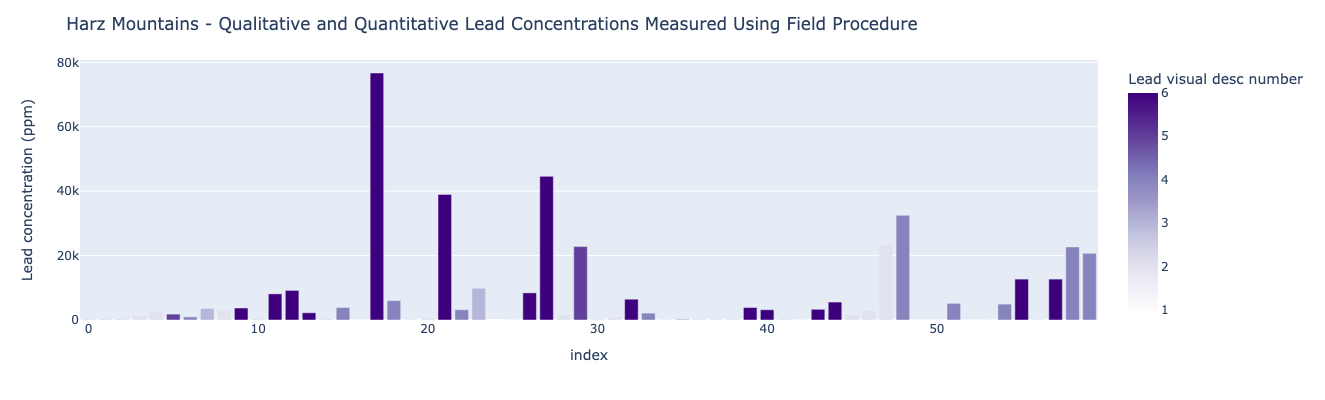

In [35]:
fig = px.bar(data, x=data.index, y=data['Lead concentration (ppm)'], color='Lead visual desc number',color_continuous_scale=px.colors.sequential.Purples)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()


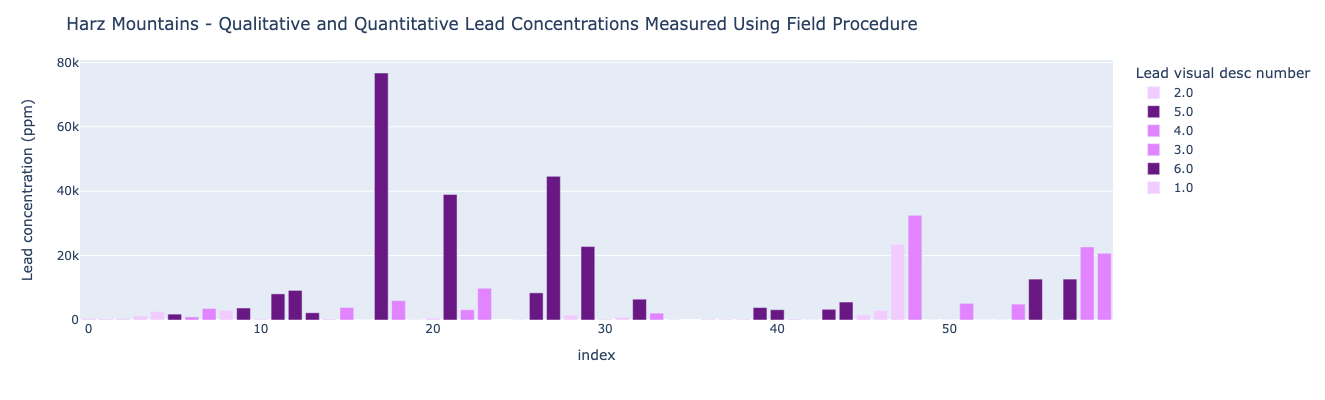

In [36]:
# color_discrete_map_purples={
#                 "1.0": "#fbeeff",
#                 "2.0": "#f3ccff",
#                 "3.0": "#e79aff",
#                 "4.0": "#e284ff",
#                 "5.0": "#b148d2",
#                 "6.0": '#691883'}

color_discrete_map_purples={
                "1.0": "#f3ccff",
                "2.0": "#f3ccff",
                "3.0": "#e284ff",
                "4.0": "#e284ff",
                "5.0": "#691883",
                "6.0": '#691883'}

data = data[data['Lead visual desc number'].notna()]
data['Lead visual desc number'] = data['Lead visual desc number'].astype(str)

fig = px.bar(data, x=data.index, y=data['Lead concentration (ppm)'], color='Lead visual desc number',color_discrete_map=color_discrete_map_purples)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')

fig.show()

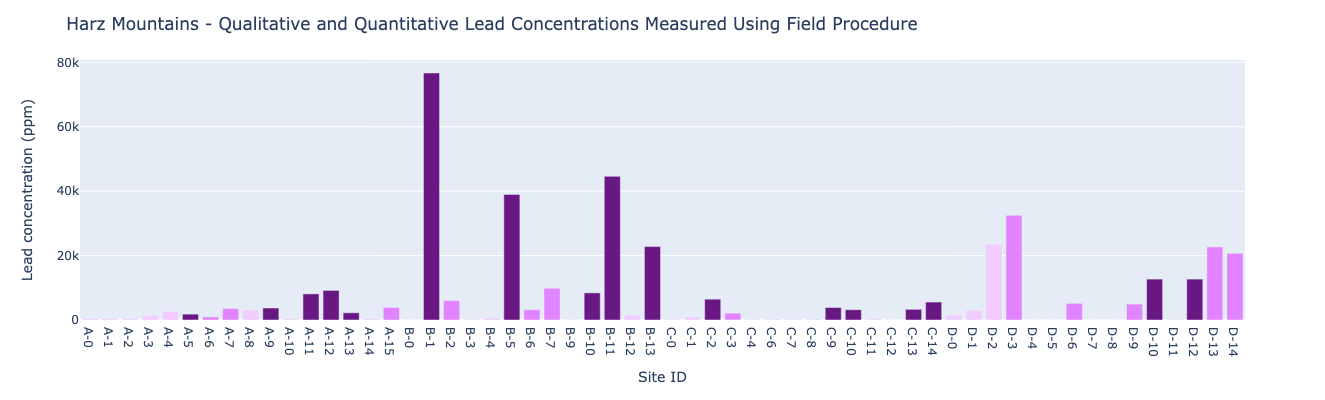

In [37]:
fig = px.bar(data, x=data['Site ID'], y=data['Lead concentration (ppm)'], color='Lead visual desc number',color_discrete_map=color_discrete_map_purples,category_orders={'Site ID': data['Site ID']})
fig.update_layout(height=400,width=1400, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.update_layout(legend=dict(
    traceorder="normal"  # or "reversed" for reverse alphabetical order
))

fig.update_layout(showlegend=False)


fig.show()


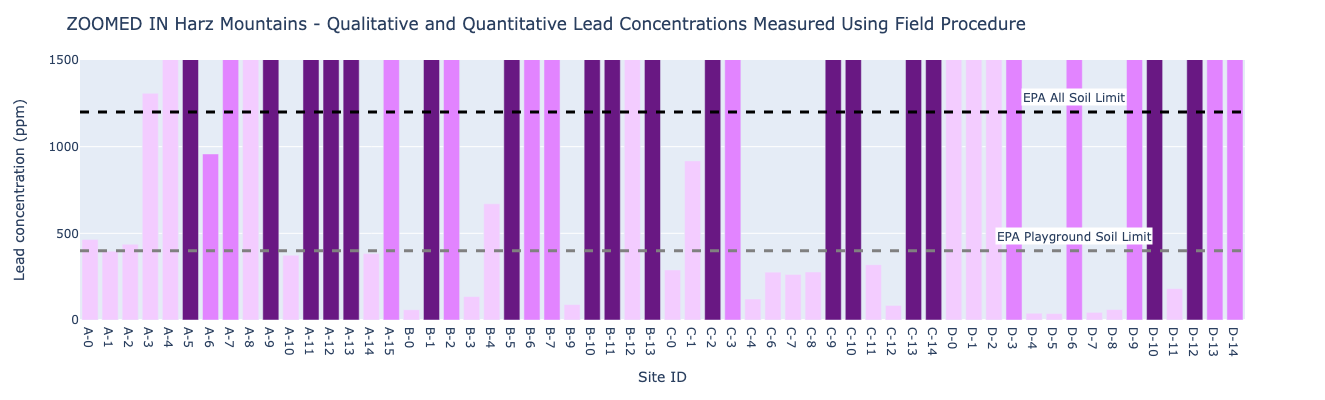

In [38]:
fig = px.bar(data, x=data['Site ID'], y=data['Lead concentration (ppm)'], color='Lead visual desc number',color_discrete_map=color_discrete_map_purples,category_orders={'Site ID': data['Site ID']})
fig.update_layout(height=400,width=1400, title_text='ZOOMED IN Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.update_layout(legend=dict(
    traceorder="normal"  # or "reversed" for reverse alphabetical order
))

fig.update_yaxes(range = [0,1500])
fig.add_hline(y=400, line_width=3, line_dash="dash", line_color="grey")
fig.add_hline(y=1200, line_width=3, line_dash="dash", line_color="black")
fig.add_annotation(x=49, y=400,text="EPA Playground Soil Limit",showarrow=False,yshift=15,bgcolor="white")
fig.add_annotation(x=49, y=1200,text="EPA All Soil Limit",showarrow=False,yshift=15,bgcolor="white")
fig.update_layout(showlegend=False)
fig.show()




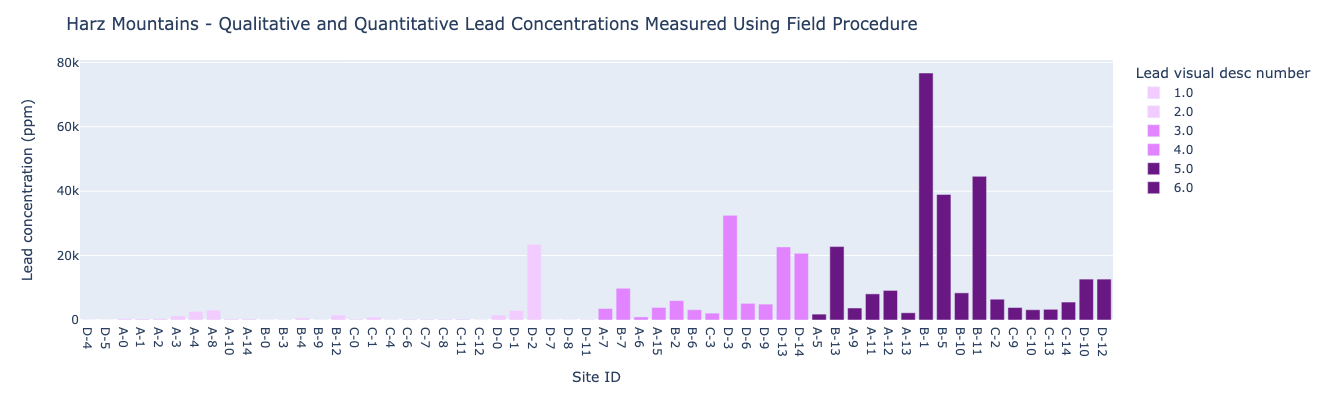

In [39]:
fig = px.bar(data, x=data['Site ID'], y=data['Lead concentration (ppm)'], color='Lead visual desc number',color_discrete_map=color_discrete_map_purples,category_orders={"Lead visual desc number": ["1.0", "2.0", "3.0", "4.0", "5.0","6.0"]})
fig.update_layout(height=400,width=1000, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.update_layout(legend=dict(
    traceorder="normal"  # or "reversed" for reverse alphabetical order
))

fig.show()


In [40]:
sorted_data = data.sort_values(by='Lead concentration (ppm)').reset_index()
sorted_data

,index,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude,XRF number,ID,Site,Site-2,Site ID
0,50,"right underneath where the car was parked, tow...",37.0,7.0,1.0,orange,Too acidic; limestone road,51.941335,10.349272,192.1,1604.0,4-KS-1D,D,5,D-5
1,49,"right underneath where the car was parked, tow...",39.0,7.0,1.0,orange,Too acidic; limestone road,51.941312,10.349232,191.8,1605.0,4-KS-1E,D,4,D-4
2,52,"area with sign of ""Lebensgefahr"" where we park...",44.0,6.0,2.0,low,NaN,51.941336,10.349422,192.5,1602.0,4-KS-1B,D,7,D-7
3,16,in the filled-in area,59.0,7.0,2.0,low,acidic,51.892027,10.421844,416.5,1578.0,2 RB 15,B,0,B-0
4,53,"near bore hole, to the left of where we parked...",60.0,7.0,2.0,low,NaN,51.932849,10.348038,204.2,1601.0,4 Sophiahütte - 1,D,8,D-8
5,42,closed Förderschacht,84.0,8.0,2.0,low,acidic,51.862277,10.297241,375.1,1581.0,3 AH01,C,12,C-12
6,25,in the filled-in area,89.0,9.0,2.0,low,acidic,51.891995,10.421816,419.7,1568.0,2 RB 05,B,9,B-9
7,34,dirt right next to gravel road,121.0,10.0,2.0,low,acidic,51.862124,10.297135,401.5,1611.0,3 AJR01,C,4,C-4
8,19,soil that was brought into the area (filled-in...,135.0,10.0,2.0,low,NaN,51.892088,10.421844,359.8,1569.0,2RB6,B,3,B-3
9,56,NaN,181.0,9.0,2.0,low,NaN,51.940942,10.348475,188.0,1594.0,4 slag 4c,D,11,D-11


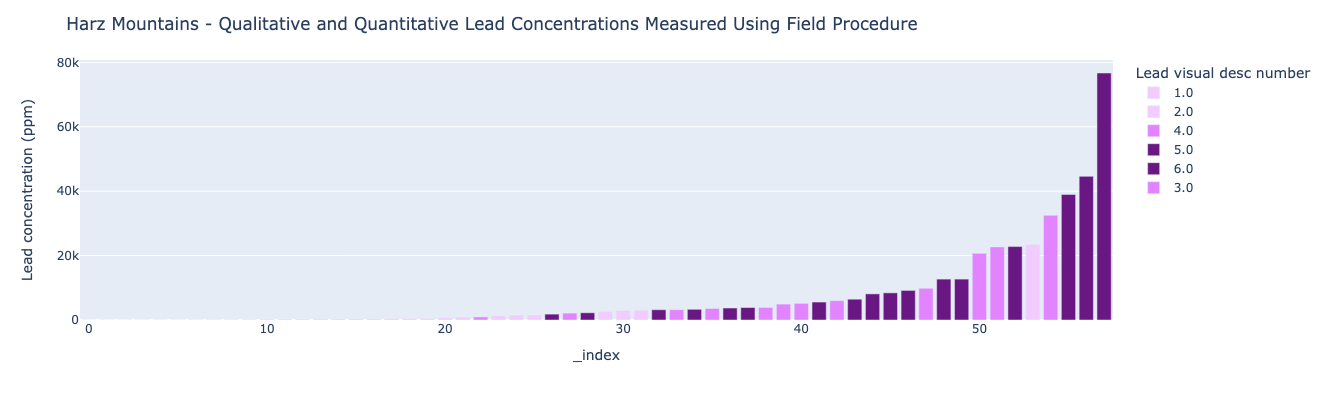

In [41]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_discrete_map=color_discrete_map_purples)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()

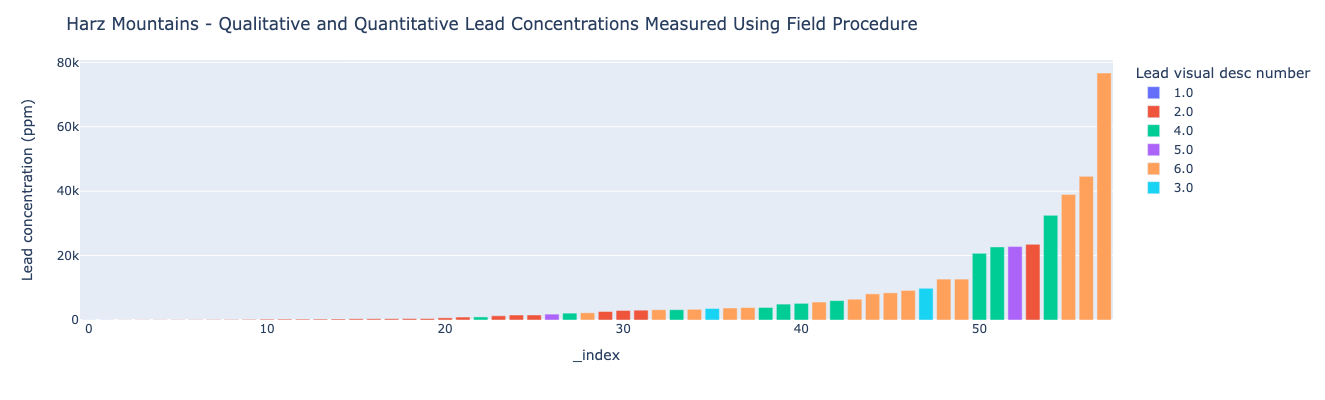

In [42]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_continuous_scale=px.colors.sequential.Purples)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()

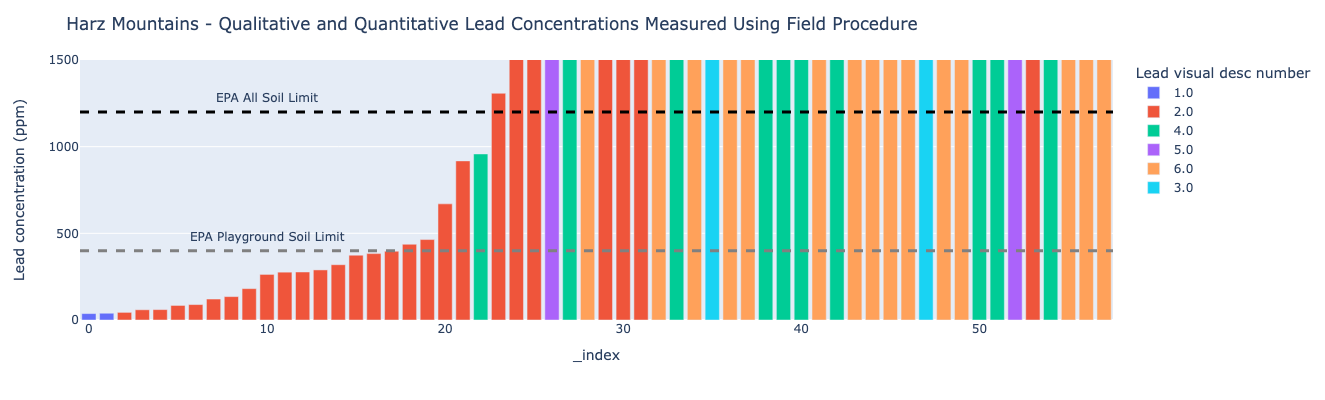

In [43]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_continuous_scale=px.colors.sequential.Purples)
fig.update_yaxes(range = [0,1500])
fig.add_hline(y=400, line_width=3, line_dash="dash", line_color="grey")
fig.add_hline(y=1200, line_width=3, line_dash="dash", line_color="black")
fig.add_annotation(x=10, y=400,text="EPA Playground Soil Limit",showarrow=False,yshift=15)
fig.add_annotation(x=10, y=1200,text="EPA All Soil Limit",showarrow=False,yshift=15)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()



In [44]:

color_discrete_map_purples

{'1.0': '#f3ccff',
 '2.0': '#f3ccff',
 '3.0': '#e284ff',
 '4.0': '#e284ff',
 '5.0': '#691883',
 '6.0': '#691883'}

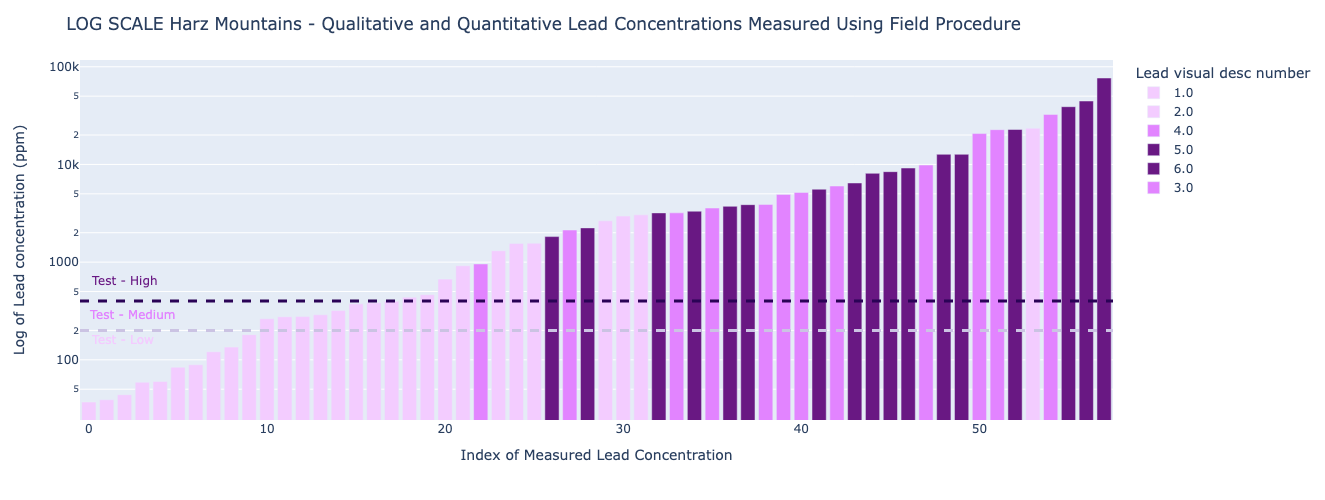

In [45]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_discrete_map=color_discrete_map_purples, log_y=True)
fig.update_layout(xaxis_title="index", yaxis_title="Log of Lead concentration (ppm)")
fig.add_hline(y=200, line_width=3, line_dash="dash", line_color="#CBC3E3")
fig.add_hline(y=400, line_width=3, line_dash="dash", line_color="#2a0356")
fig.add_annotation(text="Test - Low",xref="paper", yref="paper",x=0.01, y=0.20, showarrow=False,font=dict(color='#f3ccff'))
fig.add_annotation(text="Test - Medium",xref="paper", yref="paper",x=0.008, y=0.27, showarrow=False,font=dict(color='#e284ff'))
fig.add_annotation(text="Test - High",xref="paper", yref="paper",x=0.01, y=0.39, showarrow=False, font=dict(color='#691883'))
fig.update_layout(height=500,width=1400, title_text='LOG SCALE Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.update_layout(
    xaxis_title="Index of Measured Lead Concentration",
)
fig.show()


In [46]:
data['Lead Level'] = pd.cut(data['Lead concentration (ppm)'], bins=[0, 400, 1200, float('Inf')], labels=['Playground Safe', 'Normal Safe','Unsafe'])
data

,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude,XRF number,ID,Site,Site-2,Site ID,Lead Level
0,Crop field with barley,464.0,17.0,2.0,low,acidic,51.910843,10.510960,258.7,1555.0,1HG-01/240604,A,0,A-0,Normal Safe
1,Next to houses hedge row,397.0,17.0,2.0,low,acidic,51.911127,10.512055,264.2,1547.0,1Hg-15/240604,A,1,A-1,Playground Safe
2,In front of the houses across the street,437.0,16.0,2.0,low,acidic,51.911176,10.511766,263.8,1548.0,1HG-14/240604,A,2,A-2,Normal Safe
3,Near a path,1308.0,22.0,2.0,low,acidic,51.912635,10.508551,265.5,1558.0,1HG-13/240604,A,3,A-3,Unsafe
4,In oposit of the former crop an area with pion...,2645.0,37.0,2.0,low,acidic,51.912396,10.506208,268.6,1546.0,1HG-12/240604,A,4,A-4,Unsafe
5,Edge of the former crop area near the ground W...,1825.0,70.0,5.0,medium,acidic,51.911218,10.505228,268.6,1552.0,1HG-11/240604,A,5,A-5,Unsafe
6,"Edge former crop area with tree, sample from a...",958.0,24.0,4.0,medium,acidic,51.911172,10.507209,257.1,1554.0,1HG-09/240604,A,6,A-6,Normal Safe
7,Former crop area bottom slag heap west with me...,3580.0,49.0,3.0,low,acidic,51.910924,10.506591,256.7,1553.0,1HG-08/240604,A,7,A-7,Unsafe
8,Under tree on the edge on the former crop area...,3049.0,44.0,2.0,low,acidic,51.911166,10.507267,258.1,1549.0,1HG-10/240604,A,8,A-8,Unsafe
9,Slag heap uphill,3728.0,54.0,6.0,high,acidic,51.910379,10.508256,268.6,1550.0,1HG-07/240604,A,9,A-9,Unsafe


In [47]:
aggregated_data = data.groupby(by='Lead Level').count()[['Lead concentration (ppm)']]
aggregated_data

/tmp/ipykernel_464315/4000297132.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Lead concentration (ppm)
Lead Level,
Playground Safe,18
Normal Safe,5
Unsafe,35


A 16


/tmp/ipykernel_464315/1311267309.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



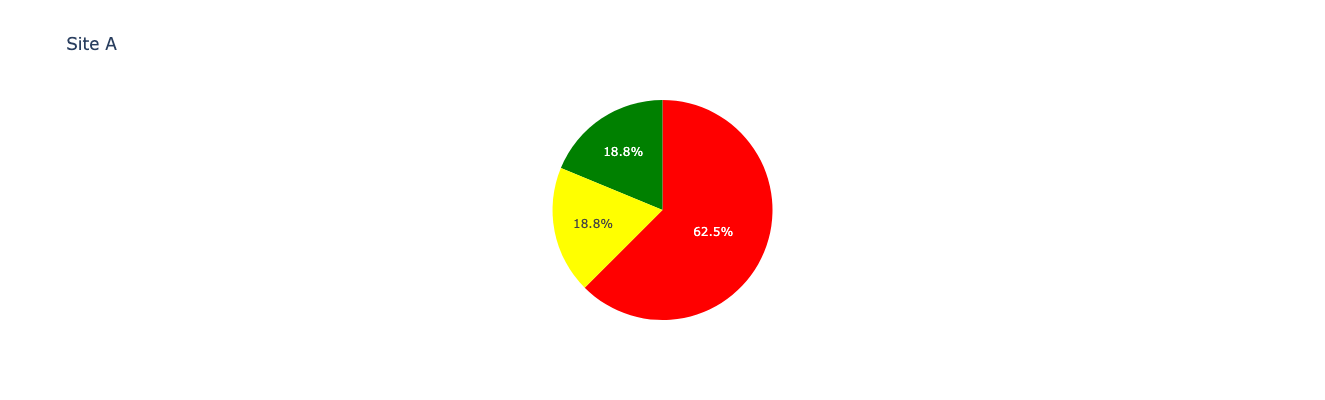

B 13


/tmp/ipykernel_464315/1311267309.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



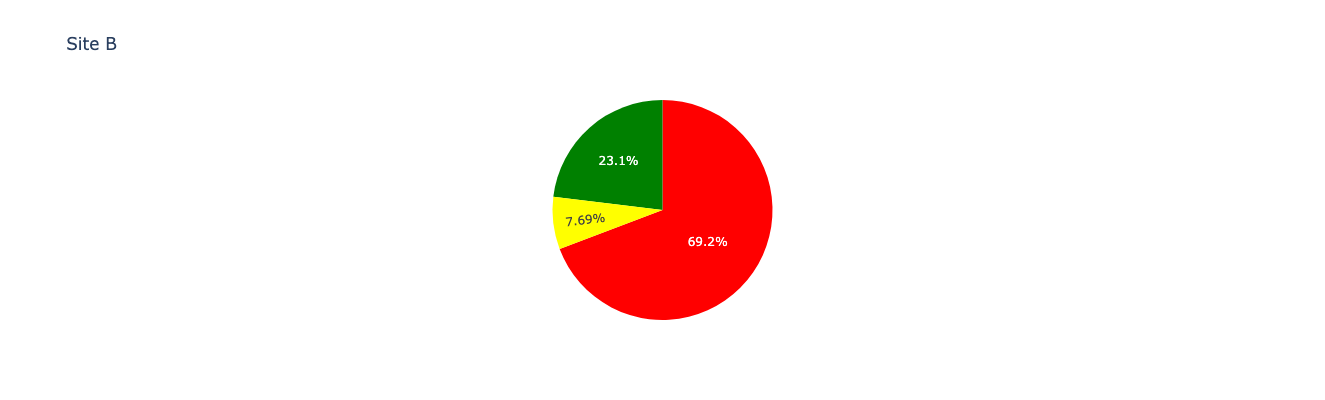

C 14


/tmp/ipykernel_464315/1311267309.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



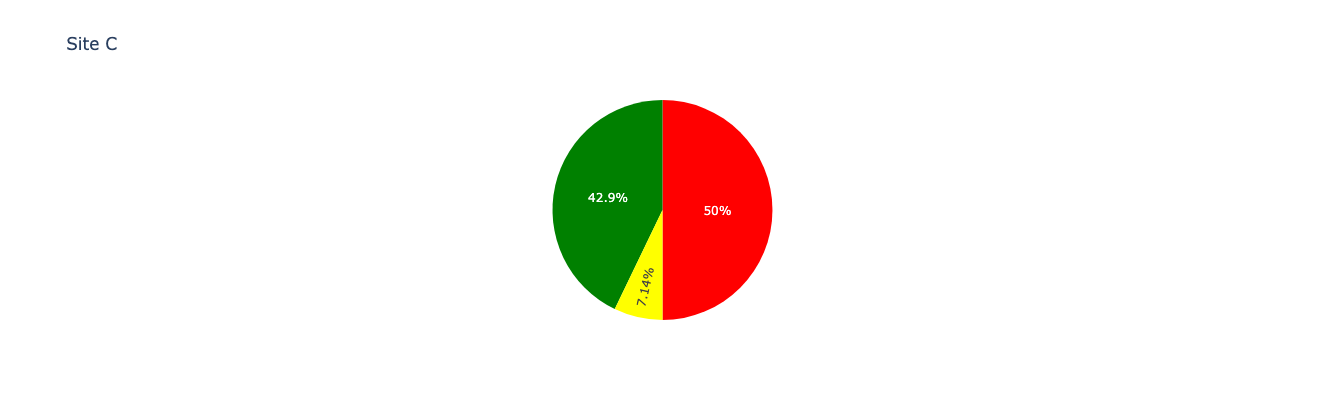

D 15


/tmp/ipykernel_464315/1311267309.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



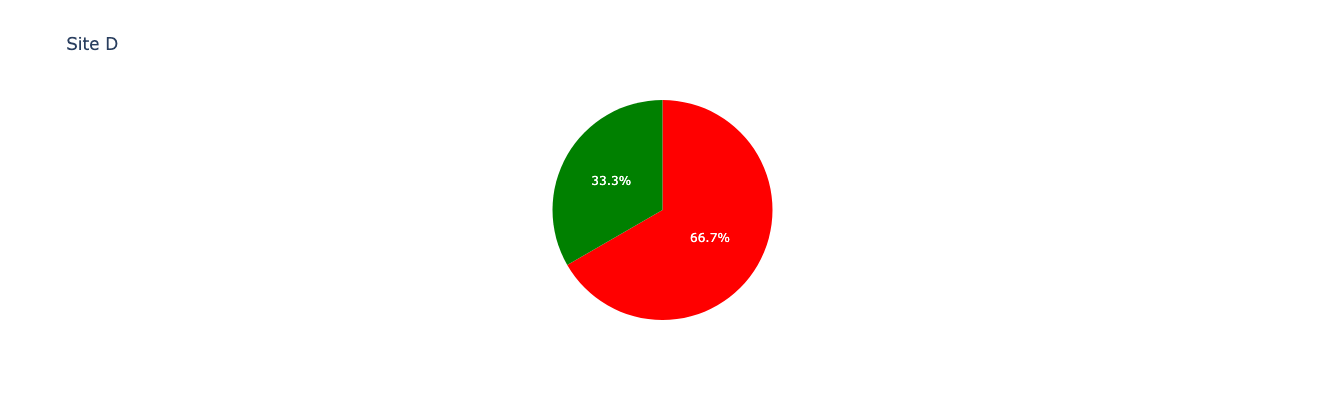

In [48]:
for site in data['Site'].unique():
    site_data = data[data['Site']==site]
    print(site, len(site_data))

    site_aggregated_data = site_data.groupby(by='Lead Level').count()[['Lead concentration (ppm)']]
    fig = px.pie(site_aggregated_data, values='Lead concentration (ppm)', names=aggregated_data.index, color_discrete_sequence=['red','green','yellow'],title='Site '+ str(site))
    fig.update_traces(textposition='inside', textinfo='percent')
    fig.update_layout(height=400,width=400, showlegend=False)

    

    fig.show()

/tmp/ipykernel_464315/1880431498.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



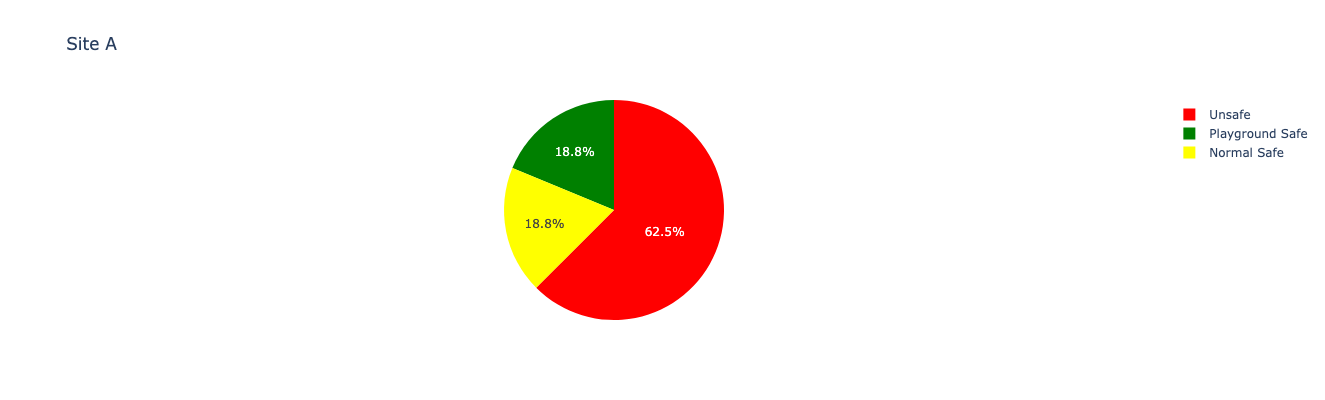

/tmp/ipykernel_464315/1880431498.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



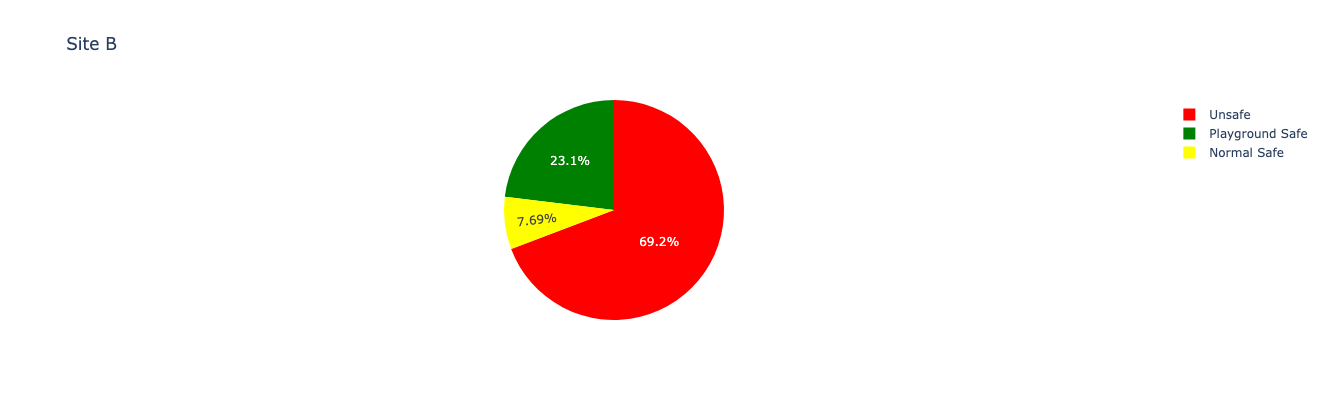

/tmp/ipykernel_464315/1880431498.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



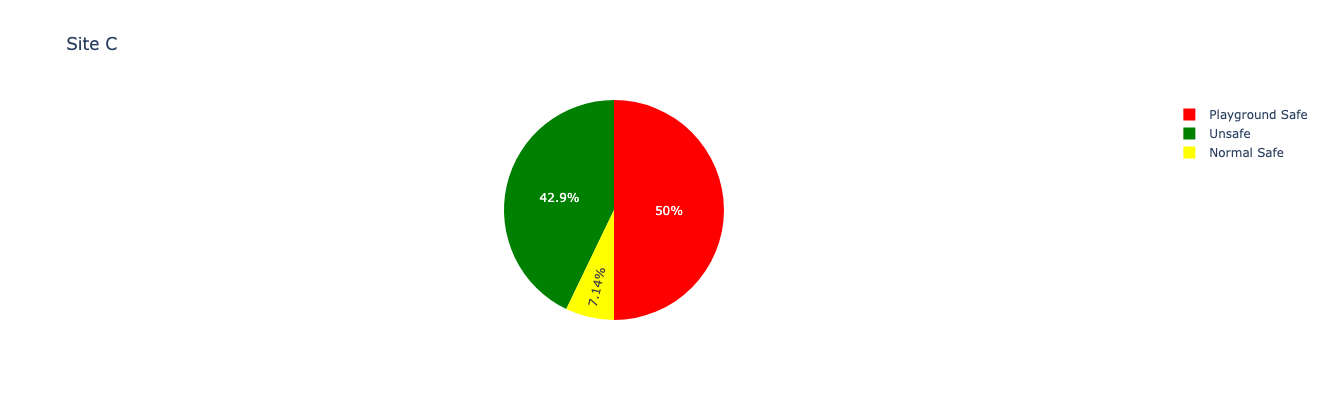

/tmp/ipykernel_464315/1880431498.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



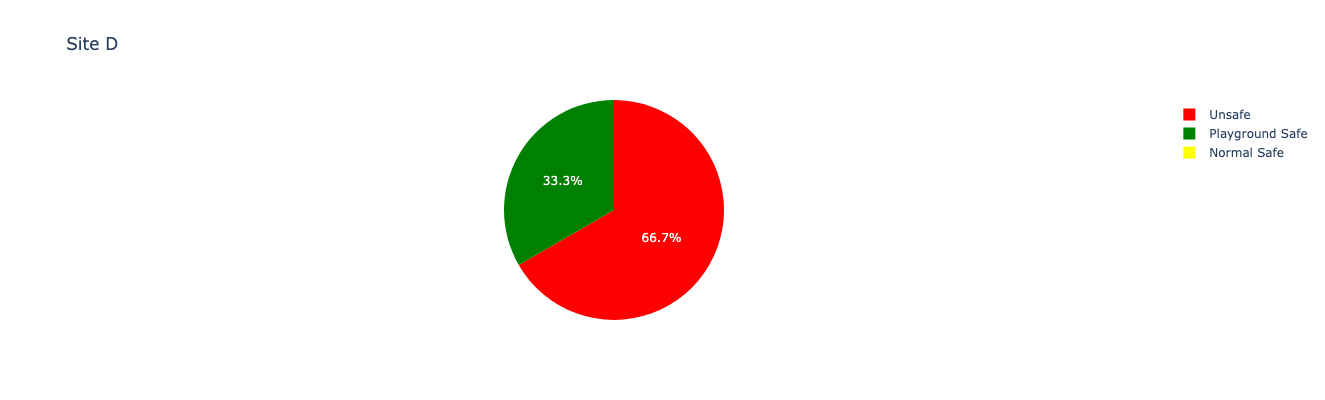

In [49]:
for site in data['Site'].unique():
    site_data = data[data['Site']==site]

    site_aggregated_data = site_data.groupby(by='Lead Level').count()[['Lead concentration (ppm)']]
    fig = px.pie(site_aggregated_data, values='Lead concentration (ppm)', names=aggregated_data.index, color_discrete_sequence=['red','green','yellow'],title='Site '+ str(site))
    fig.update_traces(textposition='inside', textinfo='percent')
    fig.update_layout(height=400,width=400, showlegend=True)

    

    fig.show()

In [50]:
site_aggregated_data

,Lead concentration (ppm)
Lead Level,
Playground Safe,5
Normal Safe,0
Unsafe,10


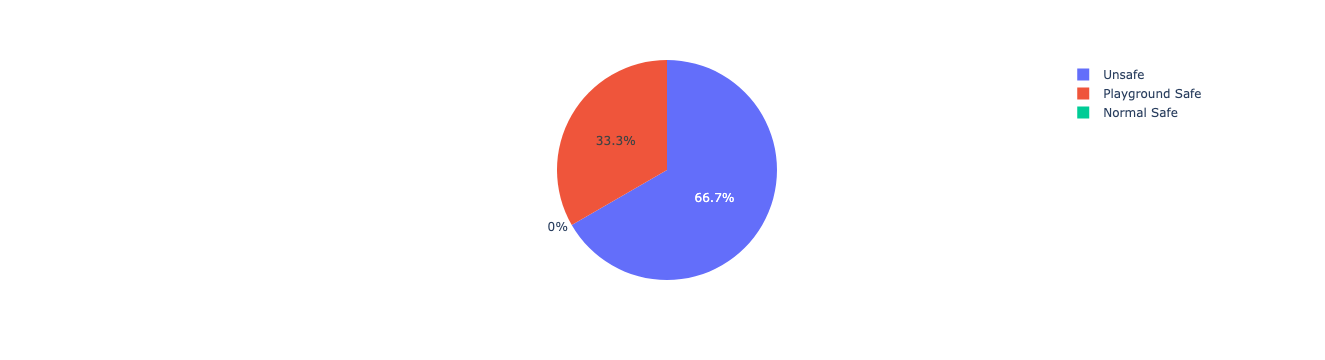

In [51]:

fig = px.pie(site_aggregated_data, values='Lead concentration (ppm)', names=aggregated_data.index, color_discrete_map={'Playground Safe':'#000000',
                                 'Normal Safe':'#ffffff',
                                 'Unsafe':'#0193945',
                                 })


fig.show()

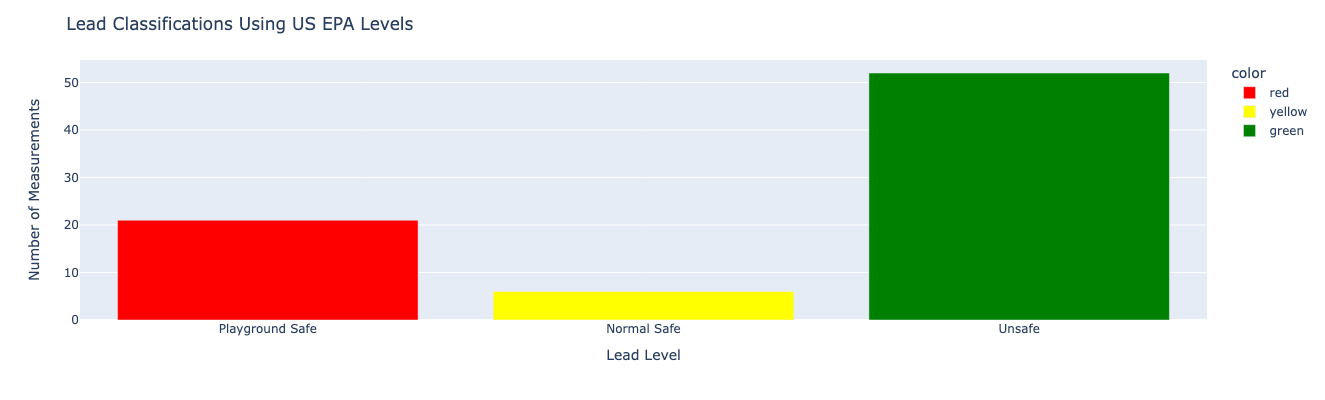

In [52]:
fig = px.bar(
    x=['Playground Safe', 'Normal Safe', 'Unsafe'],
    y=[21,6,52],
    color=['red', 'yellow', 'green'], color_discrete_sequence=['red', 'yellow', 'green'])
fig.update_layout(xaxis_title="Lead Level", yaxis_title="Number of Measurements")
fig.update_layout(height=400,width=1100, title_text='Lead Classifications Using US EPA Levels')

fig
fig.show()


In [53]:
map_data = data[['gps-Latitude', 'gps-Longitude', 'Lead concentration (ppm)']].dropna().values
m = folium.Map([51.9, 10.39], zoom_start=12)
HeatMap(map_data).add_to(m)
m

In [54]:
data

,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude,XRF number,ID,Site,Site-2,Site ID,Lead Level
0,Crop field with barley,464.0,17.0,2.0,low,acidic,51.910843,10.510960,258.7,1555.0,1HG-01/240604,A,0,A-0,Normal Safe
1,Next to houses hedge row,397.0,17.0,2.0,low,acidic,51.911127,10.512055,264.2,1547.0,1Hg-15/240604,A,1,A-1,Playground Safe
2,In front of the houses across the street,437.0,16.0,2.0,low,acidic,51.911176,10.511766,263.8,1548.0,1HG-14/240604,A,2,A-2,Normal Safe
3,Near a path,1308.0,22.0,2.0,low,acidic,51.912635,10.508551,265.5,1558.0,1HG-13/240604,A,3,A-3,Unsafe
4,In oposit of the former crop an area with pion...,2645.0,37.0,2.0,low,acidic,51.912396,10.506208,268.6,1546.0,1HG-12/240604,A,4,A-4,Unsafe
5,Edge of the former crop area near the ground W...,1825.0,70.0,5.0,medium,acidic,51.911218,10.505228,268.6,1552.0,1HG-11/240604,A,5,A-5,Unsafe
6,"Edge former crop area with tree, sample from a...",958.0,24.0,4.0,medium,acidic,51.911172,10.507209,257.1,1554.0,1HG-09/240604,A,6,A-6,Normal Safe
7,Former crop area bottom slag heap west with me...,3580.0,49.0,3.0,low,acidic,51.910924,10.506591,256.7,1553.0,1HG-08/240604,A,7,A-7,Unsafe
8,Under tree on the edge on the former crop area...,3049.0,44.0,2.0,low,acidic,51.911166,10.507267,258.1,1549.0,1HG-10/240604,A,8,A-8,Unsafe
9,Slag heap uphill,3728.0,54.0,6.0,high,acidic,51.910379,10.508256,268.6,1550.0,1HG-07/240604,A,9,A-9,Unsafe


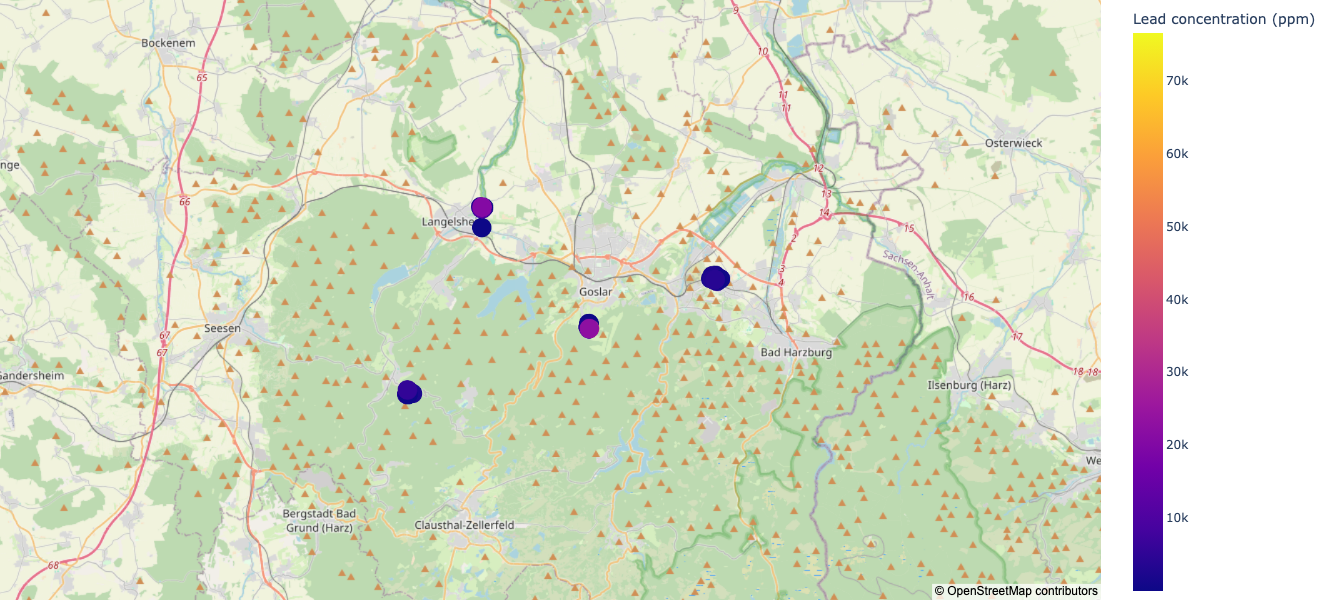

In [55]:
fig = px.scatter_mapbox(data, lat="gps-Latitude", lon="gps-Longitude", color=data["Lead concentration (ppm)"], hover_name="info", hover_data=["info"],
                        color_discrete_sequence=["red"], zoom=10, height=300).update_traces(marker={"size": 20})
fig.update_layout(mapbox_style="open-street-map", width=1000, height=600)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [56]:
import folium
import pandas as pd
import branca.colormap as cm


# Site 1

In [57]:




# Create a colormap
colormap = cm.LinearColormap(
    colors=['#2F9599','#F7DB4F','#A7226E'],
    vmin=0,
    vmax=4000
)

# Create a map
m = folium.Map(location=[51.91132, 10.51148	], zoom_start=15,control_scale=True, width=500, height=500,zoom_control=False,)


# Add markers to the map
for index, row in data[data['Lead concentration (ppm)'] >0].iterrows():
    folium.CircleMarker(
        location=[row['gps-Latitude'], row['gps-Longitude']],
        radius=8,
        fill=True,
        fill_color=colormap(row['Lead concentration (ppm)']),
        color='black',
        fill_opacity=0.9,
        weight=3
    ).add_to(m)

# Add the colormap as a legend
m.add_child(colormap)

# Display the map
m

# Site 2

In [58]:
# Create a colormap
colormap = cm.LinearColormap(
    colors=['#2F9599','#F7DB4F','#A7226E'],
    vmin=0,
    vmax=80000
)

# Create a map
m = folium.Map(location=[51.88946, 10.41911], zoom_start=17,control_scale=True, width=500, height=500,zoom_control=False,)


# Add markers to the map
for index, row in data[data['Lead concentration (ppm)'] >0].iterrows():
    folium.CircleMarker(
        location=[row['gps-Latitude'], row['gps-Longitude']],
        radius=8,
        fill=True,
        fill_color=colormap(row['Lead concentration (ppm)']),
        color='black',
        fill_opacity=0.7,
        weight=3
    ).add_to(m)

# Add the colormap as a legend
m.add_child(colormap)

# Display the map
m

# Site 3

In [59]:
# Create a colormap
colormap = cm.LinearColormap(
    colors=['#2F9599','#F7DB4F','#A7226E'],
    vmin=0,
    vmax=5000
)

# Create a map
m = folium.Map(location=[51.86745, 10.28527], zoom_start=16,control_scale=True, width=500, height=500,zoom_control=False,)


# Add markers to the map
for index, row in data[data['Lead concentration (ppm)'] >0].iterrows():
    folium.CircleMarker(
        location=[row['gps-Latitude'], row['gps-Longitude']],
        radius=8,
        fill=True,
        fill_color=colormap(row['Lead concentration (ppm)']),
        color='black',
        fill_opacity=0.7,
        weight=3
    ).add_to(m)

# Add the colormap as a legend
m.add_child(colormap)

# Display the map
m

# Site 4

In [64]:
# Create a colormap
colormap = cm.LinearColormap(
    colors=['#2F9599','#F7DB4F','#A7226E'],
    vmin=0,
    vmax=20000
)

# Create a map
m = folium.Map(location=[51.93024, 10.34661], zoom_start=17,control_scale=True, width=500, height=500,zoom_control=False,)


# Add markers to the map
for index, row in data[data['Lead concentration (ppm)'] >0].iterrows():
    folium.CircleMarker(
        location=[row['gps-Latitude'], row['gps-Longitude']],
        radius=8,
        fill=True,
        fill_color=colormap(row['Lead concentration (ppm)']),
        color='black',
        fill_opacity=0.7,
        weight=3
    ).add_to(m)

# Add the colormap as a legend
m.add_child(colormap)

# Display the map
m

# All Sites

In [63]:




# Create a colormap
colormap = cm.LinearColormap(
    colors=['#2F9599','#F7DB4F','#A7226E'],
    vmin=0,
    vmax=20000
)

# Create a map
m = folium.Map(location=[51.91, 10.4], zoom_start=11,control_scale=True, width=1000, height=500,zoom_control=False,)


# Add markers to the map
for index, row in data[data['Lead concentration (ppm)'] >0].iterrows():
    folium.CircleMarker(
        location=[row['gps-Latitude'], row['gps-Longitude']],
        radius=12,
        fill=True,
        fill_color=colormap(row['Lead concentration (ppm)']),
        color='black',
        fill_opacity=0.9,
        weight=1
    ).add_to(m)

# Add the colormap as a legend
m.add_child(colormap)

folium.map.Marker(
    [51.94, 10.49],
    icon=DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 18pt">Site A</div>',
        )
    ).add_to(m)

folium.map.Marker(
    [51.88, 10.4],
    icon=DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 18pt">Site B</div>',
        )
    ).add_to(m)

folium.map.Marker(
    [51.85, 10.27],
    icon=DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 18pt">Site C</div>',
        )
    ).add_to(m)

folium.map.Marker(
    [51.98, 10.32],
    icon=DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 18pt">Site D</div>',
        )
    ).add_to(m)


# Display the map
m